# Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
import scipy
from sklearn.linear_model import LinearRegression
from statsFuncs import compDistributions


mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [2]:
fig4_path = os.getcwd()
figures_path = str(Path(fig4_path).parent)
datapath = figures_path + '/data/radiologists/Analysis9_29_2020/rbf_back/'
regression_figures_path = fig4_path + '/regression_figures/'

# Plot params 

In [3]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Get folder and subject info 

Get number of subjects, which is number of folders in datapath -1 (the super subject)

In [4]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

128 files, 15 folders
14 subjects


In [5]:
# subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 'SuperSubject']
subject_names = ['S2']

# Slope for one subject 

In [6]:
subject = 'S1'
subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')

Check if there are NaNs, cause the fitting regression can't get NaNs.
Why may there be NaNs, you may ask? Two reasons:
1) There is no response error or stimulus difference for the first trial in a block
2) Because the original dataframe has also bootstrap values (len=5000), stimDiff and response Error have about 4750 missing values.

In [7]:
subjectdata['Stim_diff'].isnull().values.any()

True

In [8]:
len(subjectdata['Stim_diff'])

5000

In [9]:
subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]

In [10]:
subjectdata_nonan = subjectdata_selcols.dropna()
print(len(subjectdata_nonan))
subjectdata_nonan.isnull().values.any()

250


False

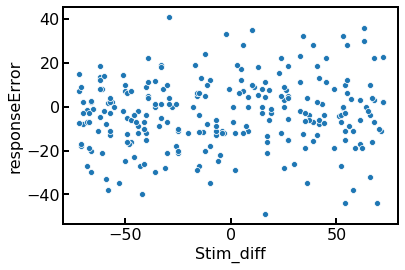

In [11]:
ax = sns.scatterplot(subjectdata_nonan['Stim_diff'], subjectdata_nonan['responseError'])


Fit a regression line with Numpy

Slope: 0.03292903138269077 . Intercept: -3.0793376094516085


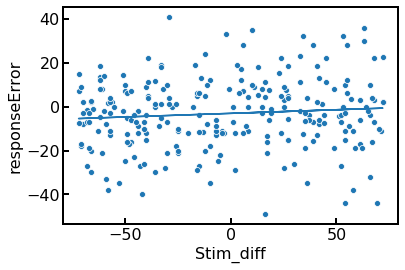

In [12]:
slope, intercept = np.polyfit(subjectdata_nonan['Stim_diff'], subjectdata_nonan['responseError'], 1)
print('Slope: ' + str(slope) + ' . Intercept: ' + str(intercept))
ax = sns.scatterplot(subjectdata_nonan['Stim_diff'], subjectdata_nonan['responseError'])
plt.plot(subjectdata_nonan['Stim_diff'], slope*subjectdata_nonan['Stim_diff'] + intercept)

Fit a regression line

intercept: -3.079337609451609
slope: [0.03292903]


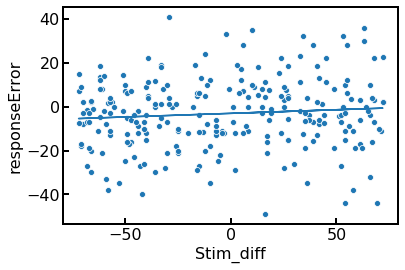

In [13]:
model = LinearRegression().fit(subjectdata_nonan['Stim_diff'].to_numpy().reshape(-1,1), subjectdata_nonan['responseError'].to_numpy())
print('intercept:', model.intercept_)
print('slope:', model.coef_)
ax = sns.scatterplot(subjectdata_nonan['Stim_diff'], subjectdata_nonan['responseError'])
plt.plot(subjectdata_nonan['Stim_diff'], model.coef_*subjectdata_nonan['Stim_diff'] + model.intercept_)

# Subject loop 

## +=19

In [14]:
nTypes = ['1', '2', '3']
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

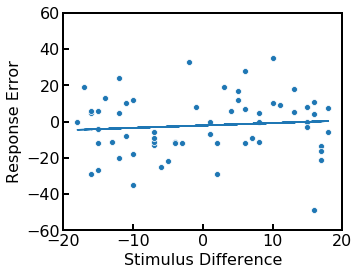

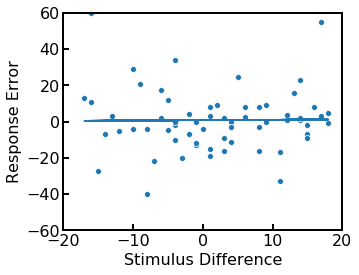

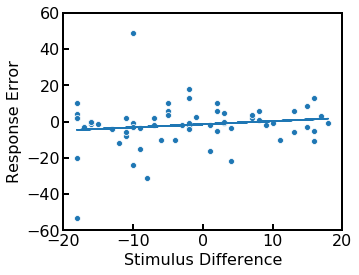

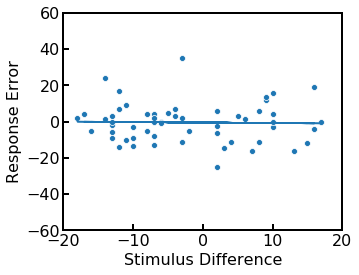

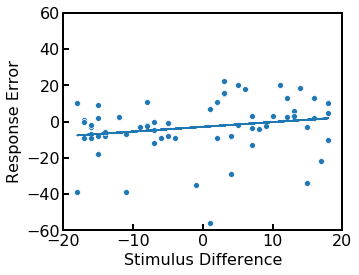

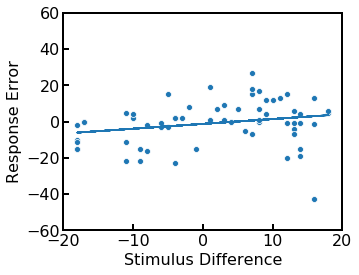

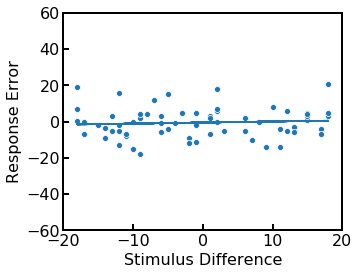

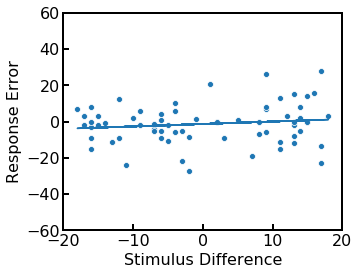

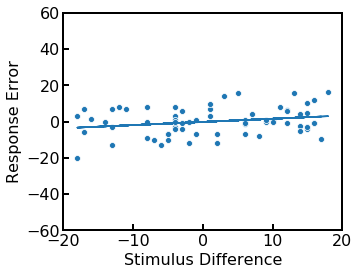

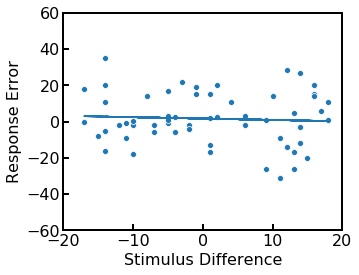

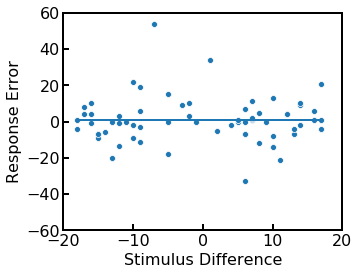

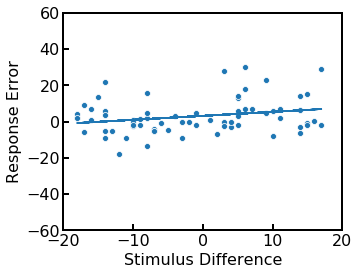

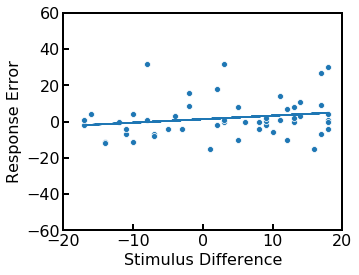

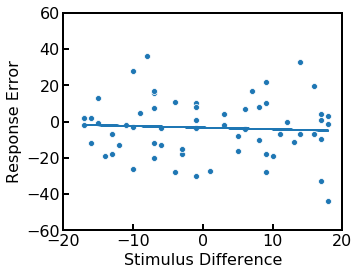

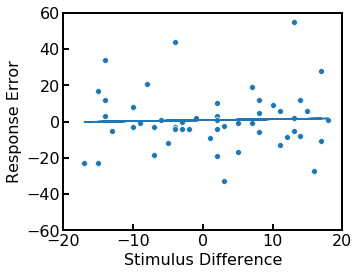

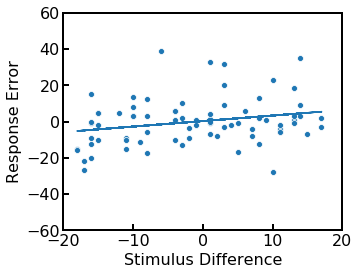

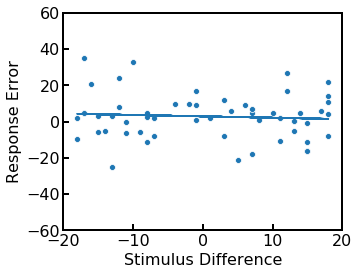

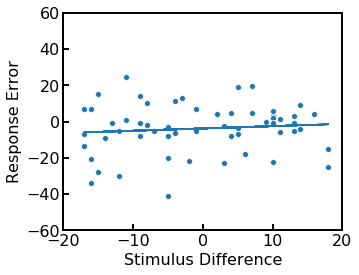

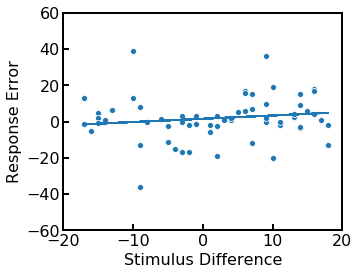

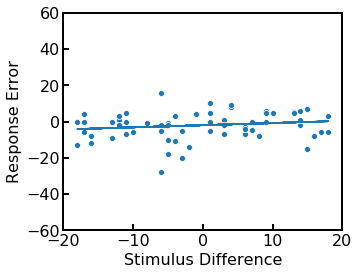

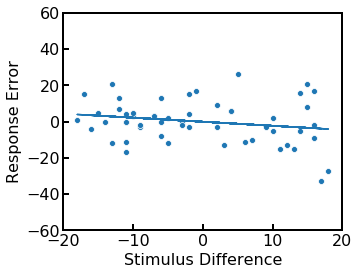

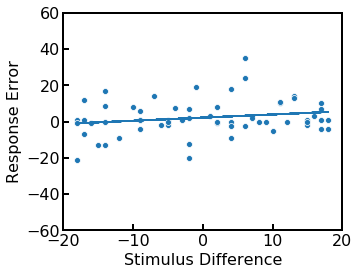

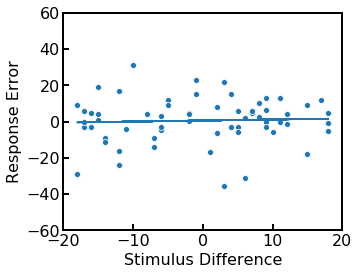

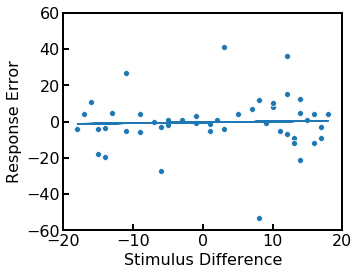

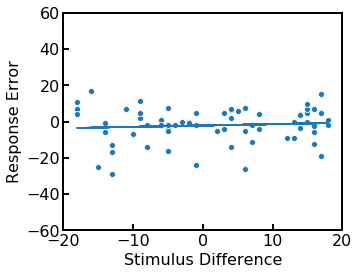

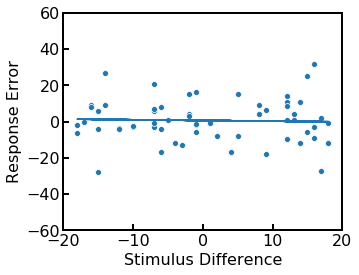

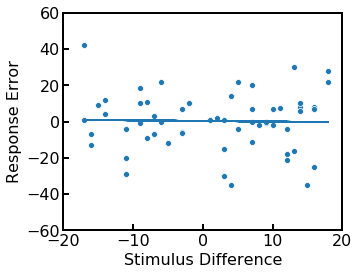

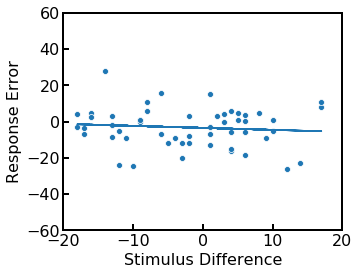

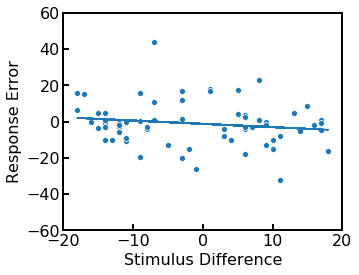

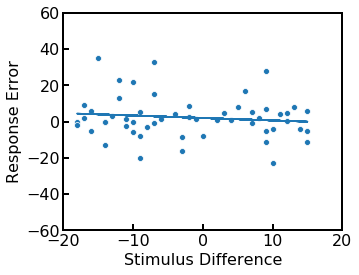

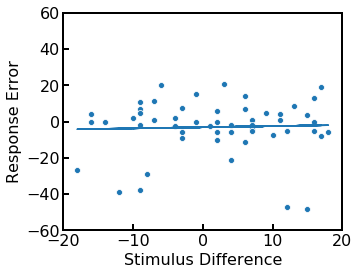

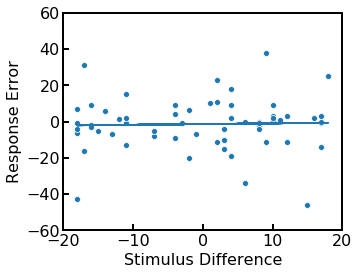

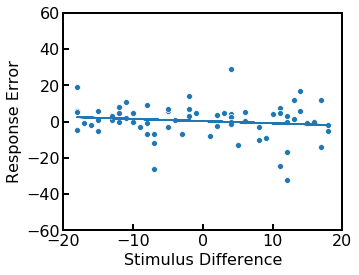

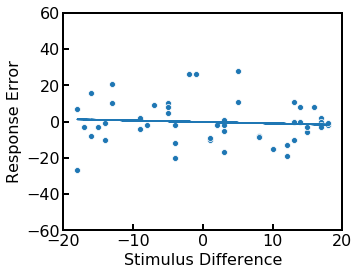

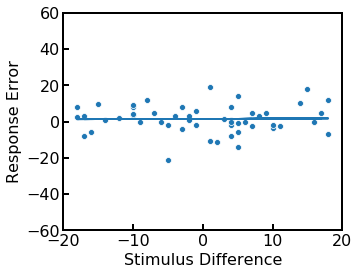

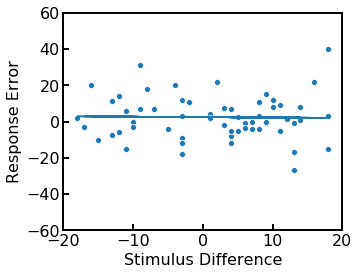

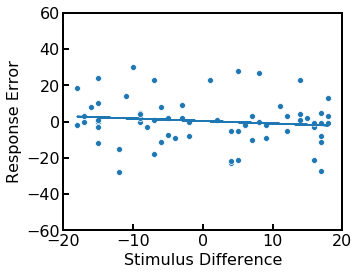

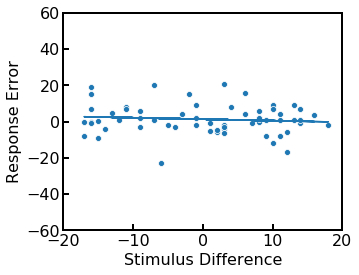

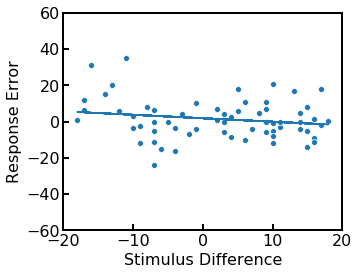

In [15]:
filter_plusminus = 19
fitting_all_data_19 = pd.DataFrame()
fitting_ntype_data_19 = pd.DataFrame()
row_subject = 0
row_all = 0
for ntype in nTypes: 
    row_type = 0
    fitting_tmp = pd.DataFrame()
    for subject in subject_names:

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
        subjectdata = pd.read_csv(filename)
        

        # select the columns we care about
        subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
        # drop the NaNs, see above the explanation why
        subjectdata_nonan = subjectdata_selcols.dropna()
        
        # restrict to +- 19
        subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
        # fit regression line
        slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
        plt.figure(figsize=(5, 4))
        ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
        plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
        plt.xlabel('Stimulus Difference')
        plt.ylabel('Response Error')
        plt.xlim(-20, 20)
        plt.ylim(-60, 60)
        plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.eps', bbox_inches='tight', dpi=1200)
        plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.jpg', bbox_inches='tight', dpi=1200)
        
        fitting_all_data_19.loc[row_subject, 'SUBJECT'] = subject
        fitting_all_data_19.loc[row_subject, 'TYPE'] = ntype        
        fitting_all_data_19.loc[row_subject, 'SLOPE'] = slope
        fitting_all_data_19.loc[row_subject, 'INTERCEPT'] =intercept
        
        fitting_tmp.loc[row_type, 'SUBJECT'] = subject
        fitting_tmp.loc[row_type, 'TYPE'] = ntype        
        fitting_tmp.loc[row_type, 'SLOPE'] = slope
        fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
        row_type += 1
        row_subject += 1
        
    mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_confidence_interval(fitting_tmp['SLOPE'])

    fitting_ntype_data_19.loc[row_all, 'TYPE'] = ntype
    fitting_ntype_data_19.loc[row_all, 'SLOPE_MEAN'] = mean_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
    fitting_ntype_data_19.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
    row_all += 1
        

In [16]:
fitting_ci_19 = pd.DataFrame(columns= nTypes)
for i in range(len(fitting_ntype_data_19)):
    
    print(i)
    ntype = fitting_ntype_data_19.loc[i, 'TYPE']
    low = fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data_19.loc[i, 'SLOPE_CI_LOW']
    up = fitting_ntype_data_19.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data_19.loc[i, 'SLOPE_MEAN'] 
    
    fitting_ci_19.loc[0, ntype] = low
    fitting_ci_19.loc[1, ntype] = up

0
1
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

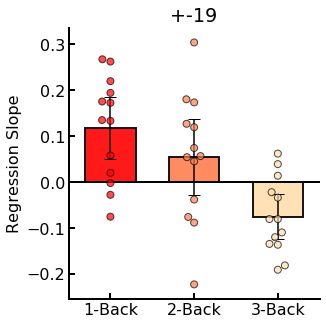

In [17]:
filter_plusminus = 19
plt.figure(figsize=(4.5, 5))

plt.bar(fitting_ntype_data_19['TYPE'], fitting_ntype_data_19['SLOPE_MEAN'], yerr=fitting_ci_19.to_numpy(), ecolor='black',
       capsize=6, color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data_19, dodge=True, size=7, alpha=0.7, edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
plt.title('+-' +  str(filter_plusminus))
plt.ylabel('Regression Slope')
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.eps', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.jpg', bbox_inches='tight', dpi=1200)

## +- 23 

In [18]:
# filter_plusminus = 23
# nTypes = ['1', '2', '3']
# subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_confidence_interval(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [19]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('Fig_4_' + str(filter_plusminus) + '.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('Fig_4_' + str(filter_plusminus) + '.svg', bbox_inches='tight', dpi=1200)

## +- 25 

In [20]:
# filter_plusminus = 25
# nTypes = ['1', '2', '3']
# subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_confidence_interval(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [21]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.jpg', bbox_inches='tight', dpi=1200)

## +- 17 

In [22]:
# filter_plusminus = 17
# nTypes = ['1', '2', '3']
# subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_confidence_interval(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [23]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.jpg', bbox_inches='tight', dpi=1200)

## +-15 

In [24]:
# filter_plusminus = 15
# nTypes = ['1', '2', '3']
# subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

# fitting_all_data = pd.DataFrame()
# fitting_ntype_data = pd.DataFrame()
# row_subject = 0
# row_all = 0
# for ntype in nTypes: 
#     row_type = 0
#     fitting_tmp = pd.DataFrame()
#     for subject in subject_names:

#         # load data:
#         filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        
#         subjectdata = pd.read_csv(filename)
        

#         # select the columns we care about
#         subjectdata_selcols = subjectdata[['Stim_diff', 'responseError']]
        
#         # drop the NaNs, see above the explanation why
#         subjectdata_nonan = subjectdata_selcols.dropna()
        
#         # restrict to +- 19
#         subjectdat_nonan_filtered =  subjectdata_nonan[(subjectdata_nonan['Stim_diff'] > -filter_plusminus) & (subjectdata_nonan['Stim_diff'] < filter_plusminus)]
#         # fit regression line
#         slope, intercept = np.polyfit(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'], 1)
        
#         plt.figure(figsize=(5, 4))
#         ax = sns.scatterplot(subjectdat_nonan_filtered['Stim_diff'], subjectdat_nonan_filtered['responseError'])
#         plt.plot(subjectdat_nonan_filtered['Stim_diff'], slope*subjectdat_nonan_filtered['Stim_diff'] + intercept)
#         plt.xlabel('Stimulus Difference')
#         plt.ylabel('Response Error')
#         plt.xlim(-20, 20)
#         plt.ylim(-60, 60)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.eps', bbox_inches='tight', dpi=1200)
#         plt.savefig(regression_figures_path + '/' + subject + '_' + str(filter_plusminus) + 'filter_' + ntype + 'nBack_regression_figures.jpg', bbox_inches='tight', dpi=1200)
        
#         fitting_all_data.loc[row_subject, 'SUBJECT'] = subject
#         fitting_all_data.loc[row_subject, 'TYPE'] = ntype        
#         fitting_all_data.loc[row_subject, 'SLOPE'] = slope
#         fitting_all_data.loc[row_subject, 'INTERCEPT'] =intercept
        
#         fitting_tmp.loc[row_type, 'SUBJECT'] = subject
#         fitting_tmp.loc[row_type, 'TYPE'] = ntype        
#         fitting_tmp.loc[row_type, 'SLOPE'] = slope
#         fitting_tmp.loc[row_type, 'INTERCEPT'] =intercept
        
#         row_type += 1
#         row_subject += 1
        
#     mean_slope, ci_low_slope, ci_up_slope = mean_confidence_interval.mean_confidence_interval(fitting_tmp['SLOPE'])

#     fitting_ntype_data.loc[row_all, 'TYPE'] = ntype
#     fitting_ntype_data.loc[row_all, 'SLOPE_MEAN'] = mean_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_LOW'] = ci_low_slope
#     fitting_ntype_data.loc[row_all, 'SLOPE_CI_UP'] = ci_up_slope
    
#     row_all += 1
        

# fitting_ci = pd.DataFrame(columns= nTypes)
# for i in range(len(fitting_ntype_data)):
    
#     print(i)
#     ntype = fitting_ntype_data.loc[i, 'TYPE']
#     low = fitting_ntype_data.loc[i, 'SLOPE_MEAN'] - fitting_ntype_data.loc[i, 'SLOPE_CI_LOW']
#     up = fitting_ntype_data.loc[i, 'SLOPE_CI_UP'] - fitting_ntype_data.loc[i, 'SLOPE_MEAN'] 
    
#     fitting_ci.loc[0, ntype] = low
#     fitting_ci.loc[1, ntype] = up



In [25]:
# plt.figure(figsize=(10, 6))

# plt.bar(fitting_ntype_data['TYPE'], fitting_ntype_data['SLOPE_MEAN'], yerr=fitting_ci.to_numpy(), ecolor='black',
#        capsize=6, color = 'darkgray')
# ax = sns.swarmplot(x='TYPE', y="SLOPE", data=fitting_all_data, dodge=True, size=10, alpha=0.7)
# plt.title('+-' +  str(filter_plusminus))
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.eps', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.svg', bbox_inches='tight', dpi=1200)
# plt.savefig('RegressionSlope_' + str(filter_plusminus) + '_radiologists.jpg', bbox_inches='tight', dpi=1200)

# Code for boostrapped slopes

## Path 

In [38]:
fig4_path = os.getcwd()
figures_path = str(Path(fig4_path).parent)
datapath = figures_path + '/data/radiologists/Analysis9_29_2020/rbf_back/'
# regression_figures_path = fig4_path + '/regression_figures/'

## Subject loop 

In [39]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']
nTypes = ['1', '2', '3']


bootstrap_data = pd.DataFrame()
row_subject = 0
for ntype in nTypes:
    for subject in subject_names:
        print(subject)
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp.loc[row_subject, 'SUBJECT'] = subject
        subjectdata_temp.loc[row_subject, 'TYPE'] = ntype
        
        for iteration in range(len(subjectdata['slopes'])):
            
            subjectdata_temp.loc[row_subject, str(iteration)] = subjectdata.loc[iteration, 'slopes']

    
        if (ntype == '1') & (subject == 'S1'):
            bootstrap_data = subjectdata_temp

        else:
            bootstrap_data = pd.concat([bootstrap_data, subjectdata_temp])
            
        row_subject += 1



S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15


In [40]:
bootstrap_trimed = pd.DataFrame()

row = 0
for ntype in nTypes:
    
    print(ntype)
    type_data = bootstrap_data[bootstrap_data['TYPE'] == ntype]
    
    for iteration in range(5000):
        
        column = str(iteration)
        
        bootstrap_trimed.loc[row,'TYPE'] = ntype
        bootstrap_trimed.loc[row, column] = np.mean(type_data[column])
        
    
    row += 1

1
2
3


## Organize error bars 

In [41]:
type_boot = pd.DataFrame()
row=0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)
    mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(type_data.iloc[0, 1:])
    
    type_boot.loc[row, 'TYPE'] = ntype
    type_boot.loc[row, 'MEAN'] = mean
    type_boot.loc[row, 'CI_LOW'] = ci_low
    type_boot.loc[row, 'CI_UP'] = ci_up
    
    row += 1
    

In [42]:
alldata_ci_boot = pd.DataFrame(columns= nTypes)
for i in range(len(type_boot)):
    
    print(i)
    ntype = type_boot.loc[i, 'TYPE']
    low = type_boot.loc[i, 'MEAN'] - type_boot.loc[i, 'CI_LOW']
    up = type_boot.loc[i, 'CI_UP'] - type_boot.loc[i, 'MEAN'] 
    
    alldata_ci_boot.loc[0, ntype] = low
    alldata_ci_boot.loc[1, ntype] = up

0
1
2


In [43]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

alldata_boot = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_SLOPE'])
ntype_data_trimed = pd.DataFrame()
ntype_data = pd.DataFrame()

row_type = 0
for ntype in nTypes:
    row = 0
    alldata_trimed_boot = pd.DataFrame()
    for subject in subject_names:
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp['BOOTSTRAP_SLOPE'] = subjectdata['slopes']
        subjectdata_temp.loc[:, 'SUBJECT'] = subject
        subjectdata_temp.loc[:, 'NTYPE'] = ntype

        print(subject)
        alldata_trimed_boot.loc[row,'SUBJECT'] = subject

        mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['slopes'])
        
        alldata_trimed_boot.loc[row, 'NTYPE'] = ntype
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_MEAN'] = mean
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
        alldata_trimed_boot.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up


        row += 1
    
    if ntype == '1':
        ntype_data = alldata_trimed_boot
        
    else:
        ntype_data = pd.concat([ntype_data, alldata_trimed_boot])
        
    print(len(alldata_trimed_boot))
    mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_boot['BOOTSTRAP_MEAN'])
    ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_boot.NTYPE.unique()
    ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
    row_type += 1
    

    
    
        


S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
13
S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
13
S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
13


## Plot 

In [44]:
boostrap_trimed_reorganized = pd.DataFrame()
row = 0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)

    for iteration in range(5000):
        
        
        boostrap_trimed_reorganized.loc[row, 'TYPE'] = ntype
        boostrap_trimed_reorganized.loc[row, 'BOOSTRAP_MEAN'] = type_data.loc[0, str(iteration)]
        
        
        row += 1
        
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

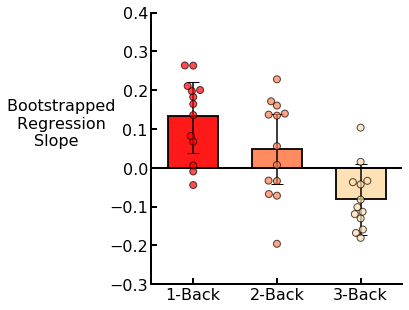

In [45]:
plt.figure(figsize=(4.5, 5))

plt.bar(type_boot['TYPE'], type_boot['MEAN'], yerr=alldata_ci_boot.to_numpy(), ecolor='black',
       capsize=6,color = ['red', 'coral', 'navajowhite'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['red', 'coral', 'navajowhite'])
sns.despine()
plt.ylabel('Bootstrapped                 \nRegression                 \nSlope                   ', rotation=0)
plt.xlabel('')
ax.set_xticklabels(['1-Back', '2-Back', '3-Back'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.ylim([-0.3, 0.4])
plt.yticks(np.arange(-0.3, 0.5, 0.1))
# plt.yticks(np.arange(-3, 7, 1.0))
plt.savefig('RegressionSlope_boot_radiologists.svg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_radiologists.jpg', bbox_inches='tight', dpi=1200)
plt.savefig('RegressionSlope_boot_radiologists.eps', bbox_inches='tight', dpi=1200)

## Test significance

0.9966


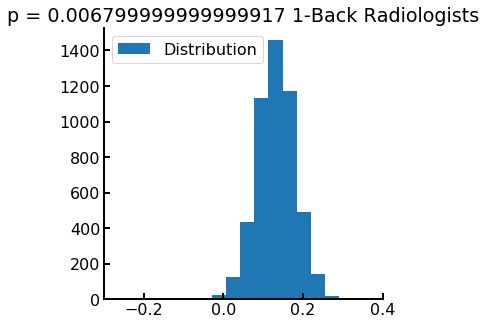

In [46]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[0, 1:], extra_title=' 1-Back Radiologists', xlim=[-0.3, 0.4])

0.8476


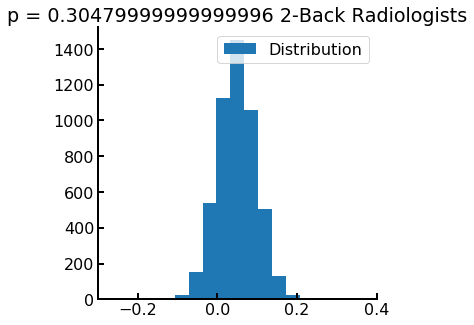

In [47]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[1, 1:], extra_title=' 2-Back Radiologists', xlim=[-0.3, 0.4])

0.045


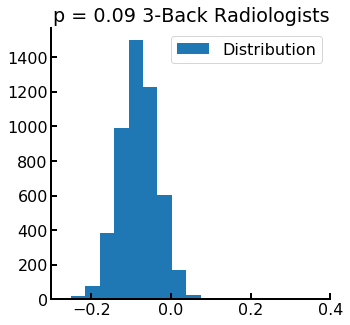

In [48]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[2, 1:], extra_title=' 3-Back Radiologists', xlim=[-0.3, 0.4])